In [1]:
import sys
import os
# Add the directory containing 'thesis_utils.py' to the system path
sys.path.append(os.path.abspath('..'))  # If 'thesis_utils.py' is one level up
# Or use this if it's in the same directory as the notebook:
# sys.path.append(os.getcwd())
# os.environ["JULIA_NUM_THREADS"] = "8" 
os.environ["PYTHON_JULIACALL_HANDLE_SIGNALS"] = "yes"
os.environ["PYTHON_JULIACALL_THREADS"] = "auto"
os.environ["PYTHON_JULIACALL_OPTLEVEL"] = "3"
from pysr import PySRRegressor
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

from thesis_utils import *

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [ ]:
import importlib
import thesis_utils  # or whatever your module is called

importlib.reload(thesis_utils)

from thesis_utils import *

In [2]:
data = pd.read_csv("data/insurance_original.csv")
# encode categorical column 'smoker' with only two categories to numerical representation as this one is highly correlated with 'charges' column
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

In [3]:
# Generate the profiling report
profile_full = ProfileReport(data, title="Insurance", explorative=True)

# Display the report in the notebook
profile_full.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:00<00:00, 55396.47it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# variable assignment according to correlation structure
independents_lst = ['age', 'smoker']
dependent_var = 'charges'
X = data[independents_lst].to_numpy()
y = data[dependent_var].to_numpy()

20250423_092221_SYCa5E

256 iterations, length_scale_bounds=(1e-3, 30), noise_level_bounds=(1e-5, 1e3)

20250423_093032_9RtTy9

1024 iterations, length_scale_bounds=(1e-3, 30), noise_level_bounds=(1e-5, 1e3)

20250423_100258_eZjRU9

1024 iterations, no denoising



In [5]:
sr_model = PySRRegressor(
        niterations=1024,  # Number of iterations to search for equations
        binary_operators=["+", "-", "*", "/"],
        unary_operators=["log", "abs", "sqrt"],
        maxdepth=10,
        elementwise_loss="loss(x, y) = (x - y)^2",  # Define loss function (mean squared error)
        verbosity=0,
        maxsize=50
    )
sr_model.fit(X, y)

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          13269.882   
	1         0.133116                                     x1 * 32049.043   
	2   >>>>  0.350366                         (x1 * 23616.01) + 8433.731   
	3         0.147891                (x0 * 222.51183) + (x1 * 23480.395)   
	4         0.007975        (x1 * 23698.977) + ((x0 - -173.30545) * x0)   
	5         0.001618    (x1 * 24075.943) + (x0 * sqrt(x0 * 1011.42505))   
	6         0.003754  (x1 * 23868.41) - ((x0 * (x0 * -3.4594262)) + ...   
	7         0.000100  (x1 * 23733.94) + ((((x0 + x1) * x0) * 3.45163...   
	8         0.000935  ((x1 * 23902.623) + 15770.542) - abs((x0 * (x0...   
	9         0.000065  ((x1 * 23040.0) + 2555.896) - (x0 * (((x1 * -0...   
	10        0.001455  ((x1 * 22406.768) + 18255.951) - abs(((x1 + 3....   
	11        0.000251  ((x1 * 23854.15) - ((-484.89008 / (x0 + -22.79...   
	12        0.012928  abs(((x0 * (x0 * -3.5534105)) + -2280.8887) - ...   
	13        0.000393  (x1 * 23673.129) + ((3.4573128 * (x0 * x0)) - ...   
	14        0.000091  ((x1 * 23498.006) - (((x1 * -4389.312) / (x0 +...   
	15        0.000467  (x1 * 22287.84) - (((x1 / (x0 + -21.581032)) *...   
	16        0.000006  abs((x1 * (-4078.3801 / (x0 + -21.587091))) + ...   
	17        0.000202  (22857.97 * x1) - ((((x1 + x1) / (x0 + -21.553...   
	18        0.000635  abs(((((4456.692 / (x0 + -21.550745)) + 23560....   
	19        0.000077  abs(((x0 * x0) / (x0 + -37.450085)) - abs((((4...   
	20        0.002313  abs(((x0 * (x1 * x0)) / (x0 + -37.465588)) - (...   
	21        0.001576  abs(((x0 * (x0 * -3.4608357)) + -2332.3042) - ...   
	22        0.000554  abs(((-3.5056272 * (x0 * x0)) - (x1 * 23560.83...   
	23        0.000772  (abs(((x0 * (x0 * -3.482505)) + -2507.2686) - ...   
	24        0.000403  abs((((x1 * (-4558.5264 / (x0 + -21.507845))) ...   
	25        0.000029  abs((((x1 * -4558.5264) / (x0 + -21.507845)) +...   
	26        0.000630  ((22977.47 * x1) - (((x1 + x1) * (-2133.0017 /...   
	27        0.000012  ((22977.47 * x1) - ((((x1 + x1) * -2133.0017) ...   
	28        0.000014  (((x1 * 22977.47) - ((((x1 + x1) * -2133.0017)...   
	29        0.000001  ((((x1 * 22977.47) - ((((x1 / -3.403032) + -3....   
	30        0.000002  (((22977.47 * x1) - (((x1 + x1) * (-2133.0017 ...   
	31        0.000005  (((x1 * 22977.47) - (((((x0 * -3.403032) + (x1...   
	32        0.000002  (((x1 * 22977.47) - (((x1 + (x1 - 0.020002088)...   
	
	           loss  complexity  
	0   146542720.0           1  
	1   112289940.0           3  
	2    55720700.0           5  
	3    41453416.0           7  
	4    40797510.0           9  
	5    40731544.0          10  
	6    40578936.0          11  
	7    40570784.0          13  
	8    40532860.0          14  
	9    40530240.0          15  
	10   40471292.0          16  
	11   40461144.0          17  
	12   39941430.0          18  
	13   39925740.0          19  
	14   39918510.0          21  
	15   39881210.0          23  
	16   39880960.0          24  
	17   39872900.0          25  
	18   39847584.0          26  
	19   39844530.0          27  
	20   39752468.0          28  
	21   39689870.0          29  
	22   39667890.0          30  
	23   39606724.0          32  
	24   39574804.0          34  
	25   39572520.0          36  
	26   39547600.0          37  
	27   39546640.0          39  
	28   39545540.0          41  
	29   39545460.0          43  
	30   39545296.0          45  
	31   39544930.0          47  
	32   39544764.0          49  
]

In [6]:
# 20250502_084530_0dm0l1
# Complexity 7
candidate_function = generate_candidate_function("(x0 * 222.51183) + (x1 * 23480.395)")

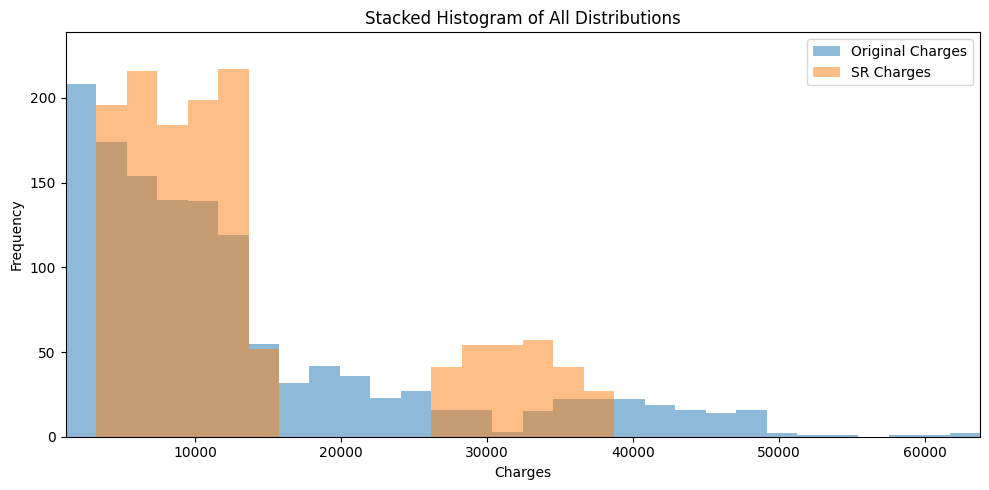

In [9]:
%matplotlib inline
y_sr = candidate_function(X)
plot_histograms([(y, 'Original Charges', None), (y_sr, 'SR Charges', None)], 'Charges', stack=True, figsize_per_plot=(10, 5))

<Figure size 640x480 with 0 Axes>

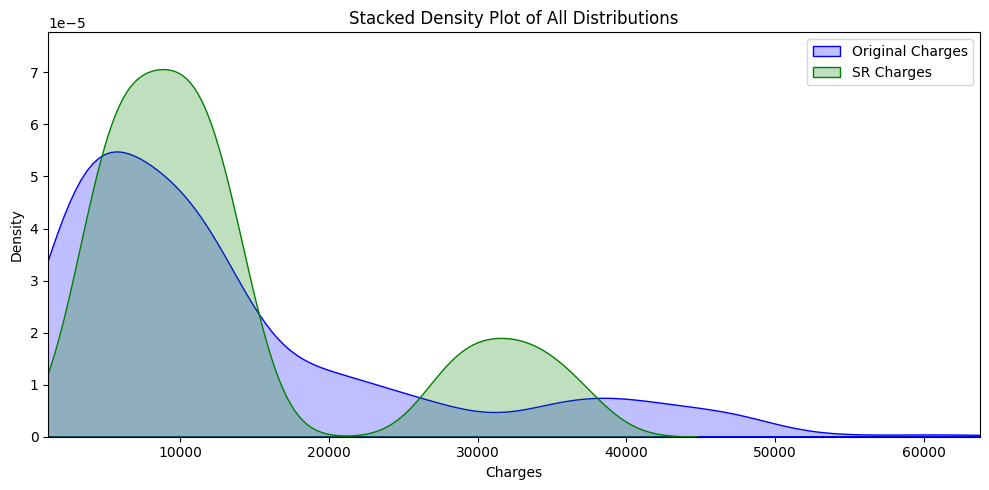

In [10]:
plot_densities([(y, 'Original Charges', 'blue'), (y_sr, 'SR Charges', 'green')], 'Charges', stack=True, figsize_per_plot=(10, 5))

In [11]:
orig_residuals = y - y_sr

In [12]:
y_corrected, best_amp, errors, _ = renoise_predictions(y, y_sr, method='stratified', seed=42, clip_lower=0, clip_upper=None, original_residuals=None, tail_replace=True, lower_percentile=50)
# ignore error in orig_residuals after first run

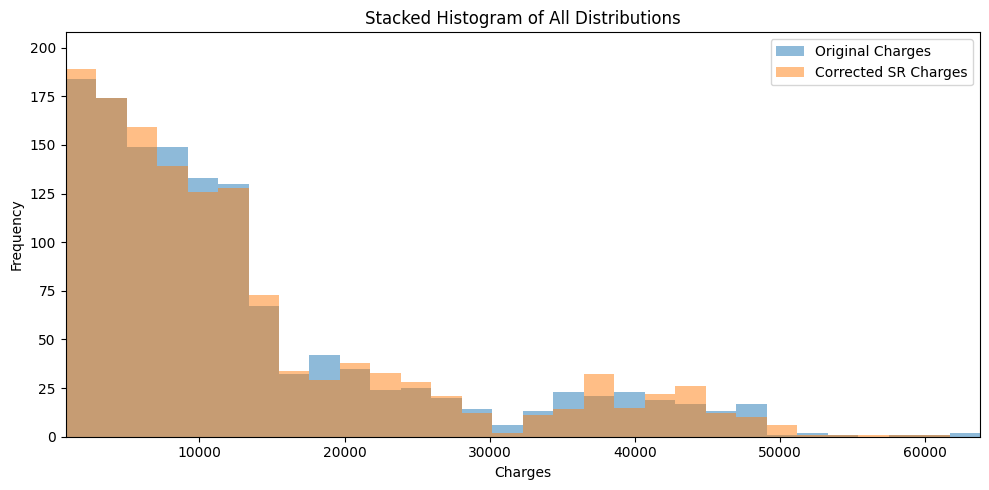

In [13]:
plot_histograms([(y, 'Original Charges', None), (y_corrected, 'Corrected SR Charges', None)], 'Charges', stack=True, figsize_per_plot=(10, 5))

<Figure size 640x480 with 0 Axes>

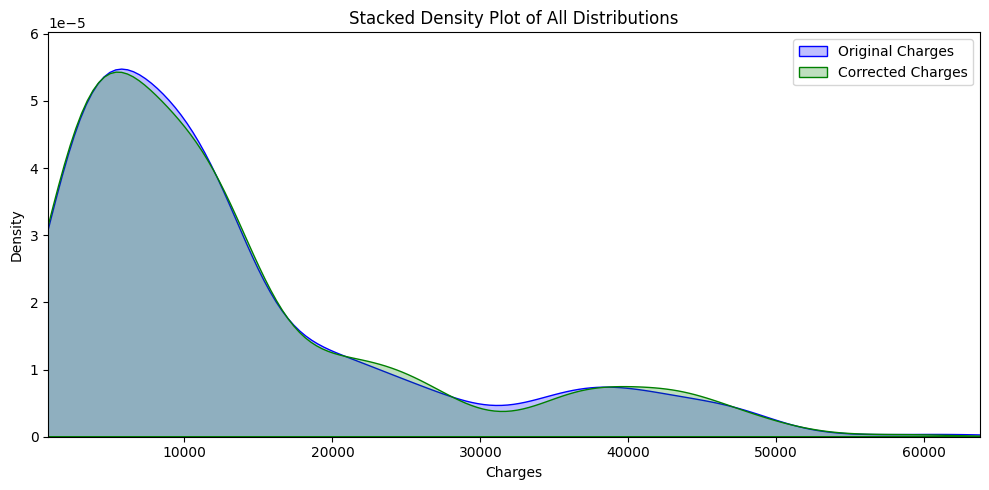

In [14]:
plot_densities([(y, 'Original Charges', 'blue'), (y_corrected, 'Corrected Charges', 'green')], 'Charges', stack=True, figsize_per_plot=(10, 5))

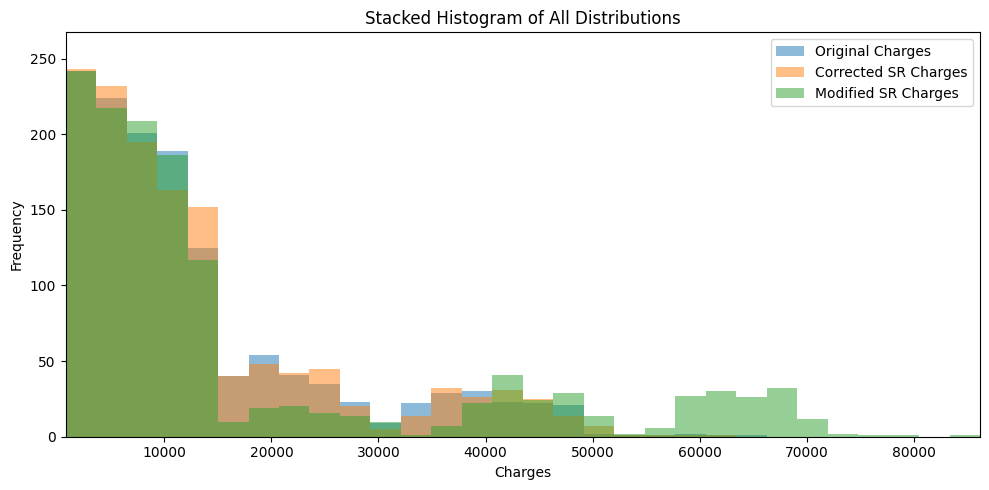

In [15]:
mod_candidate_function = generate_candidate_function("(x0 * 222.51183) + (2*x1 * 23480.395)")
mod_y_sr = mod_candidate_function(X)
mod_y_corrected, best_amp, errors, _ = renoise_predictions(y, mod_y_sr, method='stratified', amplification_factor=1.0, seed=42, clip_lower=0, clip_upper=None, original_residuals=orig_residuals, tail_replace=True, lower_percentile=50)
# ignore error in orig_residuals after first run
plot_histograms([(y, 'Original Charges', None), (y_corrected, 'Corrected SR Charges', None), (mod_y_corrected, 'Modified SR Charges', None)], 'Charges', stack=True, figsize_per_plot=(10, 5))